In [129]:
import numpy as np
import pandas as pd
import os

os.getcwd()

data = pd.read_csv("/Users/siddharthrekhade/Downloads/used_car_price_dataset_extended.csv")

print(data.head())

   make_year  mileage_kmpl  engine_cc fuel_type  owner_count  price_usd  \
0       2001          8.17       4000    Petrol            4    8587.64   
1       2014         17.59       1500    Petrol            4    5943.50   
2       2023         18.09       2500    Diesel            5    9273.58   
3       2009         11.28        800    Petrol            1    6836.24   
4       2005         12.23       1000    Petrol            2    4625.79   

       brand transmission  color service_history  accidents_reported  \
0  Chevrolet       Manual  White             NaN                   0   
1      Honda       Manual  Black             NaN                   0   
2        BMW    Automatic  Black            Full                   1   
3    Hyundai       Manual   Blue            Full                   0   
4     Nissan    Automatic    Red            Full                   0   

  insurance_valid  
0              No  
1             Yes  
2             Yes  
3             Yes  
4             Ye

In [93]:
data['car_age'] = 2025 - data['make_year']
print(data['car_age'])

0       24
1       11
2        2
3       16
4       20
        ..
9995    29
9996    28
9997    23
9998    20
9999    18
Name: car_age, Length: 10000, dtype: int64


In [94]:
colunique = [[col, data[col].unique()] for col in data.columns]
print(colunique)

[['make_year', array([2001, 2014, 2023, 2009, 2005, 2002, 2015, 2020, 2013, 2017, 2018,
       1998, 1997, 2016, 1996, 2006, 2000, 2022, 1995, 2019, 2011, 2021,
       2004, 2010, 1999, 2003, 2012, 2008, 2007])], ['mileage_kmpl', array([ 8.17, 17.59, 18.09, ...,  9.77,  8.27,  6.51])], ['engine_cc', array([4000, 1500, 2500,  800, 1000, 2000, 5000, 1800, 3000, 1200])], ['fuel_type', array(['Petrol', 'Diesel', 'Electric'], dtype=object)], ['owner_count', array([4, 5, 1, 2, 3])], ['price_usd', array([ 8587.64,  5943.5 ,  9273.58, ...,  4557.1 ,  7413.59, 11634.09])], ['brand', array(['Chevrolet', 'Honda', 'BMW', 'Hyundai', 'Nissan', 'Tesla',
       'Toyota', 'Kia', 'Volkswagen', 'Ford'], dtype=object)], ['transmission', array(['Manual', 'Automatic'], dtype=object)], ['color', array(['White', 'Black', 'Blue', 'Red', 'Gray', 'Silver'], dtype=object)], ['service_history', array([nan, 'Full', 'Partial'], dtype=object)], ['accidents_reported', array([0, 1, 2, 3, 4, 5])], ['insurance_valid', ar

In [97]:
data['service_history'] = data['service_history'].fillna('None')
# data = data.drop(['make_year', 'color'], axis = 1)

print(data['car_age'])

0       24
1       11
2        2
3       16
4       20
        ..
9995    29
9996    28
9997    23
9998    20
9999    18
Name: car_age, Length: 10000, dtype: int64


In [115]:
X = data.iloc[:, [x for x in range(0,11) if x != 4]]
Y = data.iloc[:, 4]

print(X)
print(Y)

      mileage_kmpl  engine_cc fuel_type  owner_count      brand transmission  \
0             8.17       4000    Petrol            4  Chevrolet       Manual   
1            17.59       1500    Petrol            4      Honda       Manual   
2            18.09       2500    Diesel            5        BMW    Automatic   
3            11.28        800    Petrol            1    Hyundai       Manual   
4            12.23       1000    Petrol            2     Nissan    Automatic   
...            ...        ...       ...          ...        ...          ...   
9995         15.25       1500    Petrol            2    Hyundai       Manual   
9996         14.45       5000    Diesel            1      Honda       Manual   
9997         19.41       1000    Diesel            4        Kia       Manual   
9998         12.95       4000    Petrol            5        BMW    Automatic   
9999         18.81       5000    Petrol            1        BMW    Automatic   

     service_history  accidents_reporte

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

regressor, cat_encoder, num_encoder = RandomForestRegressor(), OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), StandardScaler()

categorical_columns = ['fuel_type', 'brand', 'transmission', 'service_history', 'insurance_valid']
numerical_columns = ['mileage_kmpl', 'engine_cc', 'owner_count', 'accidents_reported', 'car_age']


preprocessor = ColumnTransformer(
    transformers = [('cat_encoder', cat_encoder, categorical_columns),
                   ('num_encoder', num_encoder, numerical_columns)],
    remainder = 'passthrough'
)

model = Pipeline(
    steps = [('preprocessor', preprocessor),
            ('regressor', regressor)]
)

# model = RandomForestRegressor()

model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [122]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(mae, r2)

857.9272082 0.8522056923971615


In [125]:
from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import StandardScaler

regressor2 = MLPRegressor(
    hidden_layer_sizes=(32, 16),
    max_iter=1000,
    learning_rate_init=0.001,
    alpha=0.01,  # L2 regularization
    random_state=42
)

numeric_columns = ['']

model2 = Pipeline(
    steps = [('preprocessor', preprocessor),
            ('regressor', regressor2)]
)

model2.fit(x_train, y_train)

predictions2 = model2.predict(x_test)

mae_2, r2_2 = mean_absolute_error(y_test, predictions2), r2_score(y_test, predictions2)

print(mae_2, r2_2)

/Users/siddharthrekhade/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/siddharthrekhade/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/siddharthrekhade/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


784.9667386405754 0.8755774117924413


/Users/siddharthrekhade/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/siddharthrekhade/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/siddharthrekhade/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


<function matplotlib.pyplot.show(close=None, block=None)>

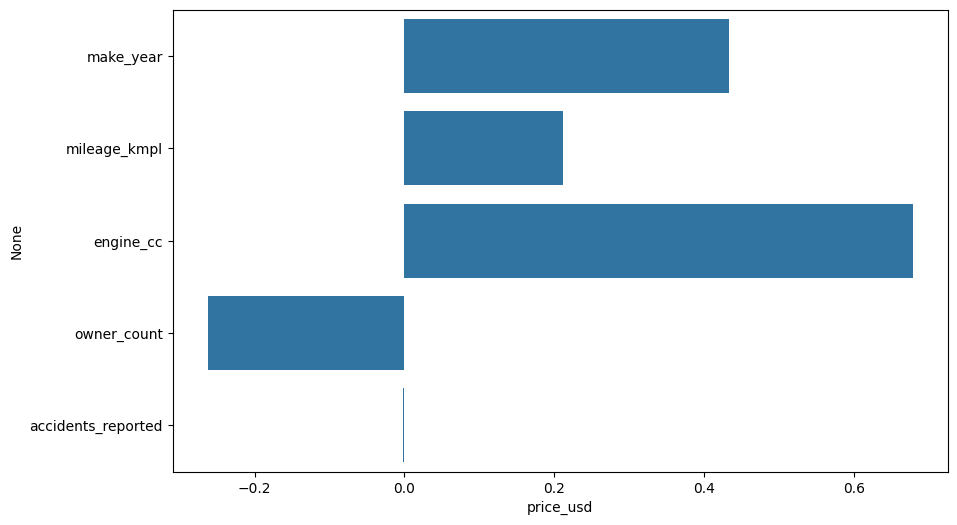

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.hist(Y, bins=50)
# plt.title("Target distribution")
# plt.show()

correlations = data.corr(numeric_only = True)

plt.figure(figsize = (10,6))
sns.barplot(x = correlations['price_usd'].drop('price_usd'), y = correlations.index.drop('price_usd'))
plt.show